In [260]:
import pandas as pd
import jsonlines
import numpy as np
import random

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 500)  # Display full text in columns


## Datasets

In [5]:
# Analyzing Political Bias and Unfairness in News Articles at Different Levels of Granularity
# Political Ideology and Polarization: A Multi-dimensional Approach

import json

with open("data/released_data.json", "r") as file:
    j_string = file.readline()
    jsons = []
    while j_string:
        data = json.loads(j_string)
        jsons.append(data)
        j_string = file.readline()
        
df = pd.DataFrame(jsons)

df_right_bias = df.loc[(df['allsides_bias'] == 'From the Right') & (df['adfontes_political'] == 'bias') & (df['adfontes_fair'] == 'bias')] 

df_left_bias = df.loc[(df['allsides_bias'] == 'From the Left') & (df['adfontes_political'] == 'bias') & (df['adfontes_fair'] == 'bias')] 

df.tail(6)


,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
7769,Washington Times,PICKET: RNC's Priebus hits back at MSNBC's Matthews - 'He wants to be the biggest jerk in the room',0,bias,neutral,From the Right,"*UPDATE 8/29/12 - MSNBC’s Chris Matthews Responded to Chairman Priebus:\n“Nobody’s asked me to apologize,” said MSNBC’s Chris Matthews. “I was telling the truth…those ads are aimed at racial purpose,” he later added.","{'time': 'None', 'topics': 'Election: Presidential', 'author': ['Kerry Picket']}"
7770,Politico,Ann Romney's task: Humanize Mitt,0,bias,neutral,From the Left,"TAMPA, Fla. — Ann Romney will take to the podium here Tuesday night and try to accomplish what the sharpest minds in Republican politics have failed to do: present her stiff and awkward husband as a likable guy.\nHer speech is considered second in importance only to Mitt Romney’s and will set the tone for the week as the Republican Party presents its case for turning President Barack Obama out of office.\nStory Continued Below\nConvention and campaign officials see Ann Romney as the only per...","{'time': '2012-08-28 04:59:14', 'topics': 'Election: Presidential', 'author': ['LOIS ROMANO', 'Frida Ghitis', 'John A. Farrell', 'Jeff Greenfield', 'Cliff Sims']}"
7771,Washington Times,'Mittigator' to make case for Romney,0,bias,neutral,From the Right,"She is a gracious warrior with a kind face, a polished demeanor and the inner mettle of a survivor. Ann Romney has been called the secret weapon of her husband’s campaign, and he adores her: When Mitt Romney strides to the podium to introduce his wife of 43 years, he calls her “sweetheart.” She smiles. The crowd goes crazy.\nAnd why shouldn’t they? Though the Romneys could emerge as the nation’s No. 1 power couple, there is a certain authenticity about them, built over decades around family ...","{'time': 'None', 'topics': 'Election: Presidential', 'author': ['Jennifer Harper']}"
7772,Fox News,"Convention-bound Ryan slams Obama for presiding over 'debt, doubt and decline'",0,bias,bias,From the Right,"Republican VP pick on 'Special Report'\nMaking one last stop in his hometown before flying to Tampa for the official nomination to the Republican ticket, vice presidential pick Paul Ryan slammed the current White House for putting the nation down a road of ""debt, doubt and decline.""\nIn an interview with Fox News&apos Bret Baier, Ryan teed up his speech at the Republican National Convention by stressing that the weather-delayed event will nevertheless provide a critical opportunity to draw a...","{'time': '2012-08-27 00:00:00', 'topics': 'Election: Presidential', 'author': ['| Fox News']}"
7773,Politico,Ryan seeks comfort of Ron Paul fans,0,bias,neutral,From the Left,"Paul Ryan said Monday he expects Ron Paul supporters will come around to the Republican ticket and “should be very comfortable with us.”\nRyan told Fox News that he and Paul “see eye to eye on a lot of issues,” adding that he doesn’t feel there is any tension with Paul — who held his own rally in Tampa on Sunday and did not endorse Romney — or the Texas congressman’s supporters.\nStory Continued Below\n“So I think, in the final analysis, Ron is clearly going to — he and his supporters should...","{'time': '2012-08-27 15:52:45', 'topics': 'Election: Presidential', 'author': ['MACKENZIE WEINGER', 'Frida Ghitis', 'John A. Farrell', 'Jeff Greenfield', 'Cliff Sims']}"
7774,CNN (Web News),Paul to supporters: 2012 the start of a new era,0,bias,neutral,From the Left,"Tampa, Florida (CNN) \- As Rep. Ron Paul's third presidential bid is set to come to its formal end at the Republican National Convention, Paul sought to rally his loyal supporters with talk of a new era in American history.\n""I'm convinced that we're living at the end of an era,"" Paul told the crowd at a rally in honor of him and his libertarian political movement. ""The end of an era provides an opportunity,"" Paul added before laying out his view that an era in A

In [6]:
df_right_bias.sample(3)

,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
4804,Fox News,Security Expert: My Fear is That More Churches Will be Targeted,0,bias,bias,From the Right,"South Carolina governor delivers emotional statement after Charleston church massacre\nThe gunman walked into the church sanctuary and opened fire.\nHe showed no mercy – firing more than 100 rounds and exploding a pipe bomb in the balcony. There was nowhere to hide from the carnage.\nClick here to follow Todd on Facebook for conservative conversation!\nSeven people died that night. Seven others were wounded.\nIt was Sept. 15, 1999 – the day a madman slaughtered Christians inside Wedgwood Bap...","{'time': '2015-06-18 00:00:00', 'topics': 'Violence in America', 'author': ['Todd Starnes', '| Fox News']}"
4321,Fox News,Turnout is name of the game in Iowa caucuses,0,bias,bias,From the Right,"The 2016 presidential contenders are begging their Iowa supporters to get to the caucuses Monday and Donald Trump, true to form, is in-your-face about it.\n""You&aposre from Iowa,"" Trump told a Dubuque crowd Saturday. ""Are you afraid of snow?""\nA snowfall forecast to start Monday night appeared more likely to hinder the hopefuls in their rush out of Iowa than the voters who will be flocking to the caucuses in the first contest of the presidential campaign.\nStill, there was every reason for c...","{'time': '2016-01-31 00:00:00', 'topics': 'Election: Presidential', 'author': ['| Associated Press']}"
4037,Newsmax,Ted Cruz Desperately Seeks to Stop Donald Trump in Indiana,0,bias,bias,From the Right,"Republican Ted Cruz faces a high-stakes test for his slumping presidential campaign in Tuesday's Indiana primary, one of the last opportunities for the Texas senator to halt Donald Trump's stunning march toward the GOP nomination. Cruz has spent the past week camped out in Indiana, securing the support of the state's governor and announcing retired technology executive Carly Fiorina as his running mate. Yet his aides were pessimistic heading into Tuesday's voting and were prepared for Cruz t...","{'time': '2016-05-03 06:42:00', 'topics': 'Election: Presidential', 'author': ['JULIE PACE and SCOTT BAUER']}"


In [7]:
csv_file = "data/toxicbias_train.csv"
df = pd.read_csv(csv_file)

# Display the DataFrame
df.sample(5)


,comment_text,identity_attack_x,bias,target,category,rationale
2842,Also prohomophobic protraitorstoAmerica proNO HEALTHCARE promisogyny profascist dictators ...,0.2875,neutral,NaN,none,NaN
3142,If we should blame all Muslims for the acts of a few as many on the right feel we should be doing then yes we should blame all Christians for the actions of this one guy.,0.8000,neutral,NaN,none,NaN
4234,Christianity is the Religion of Love except for the part where Catholic and Protestant want to kill each other riight.,0.5125,bias,christians,religion,prejudice towards christians
4190,hipsters white people with dreadlocks credit card hippies and selfentitled selfrighteous over privileged idealistic white millenials. if i were a minority a woman or gay these would be the absolute last people i would want taking up my cause or attempting to represent my interests andor frustrations. but alas i am in fact the problem a thirtysomething white male the sole cause of every injustice ever perpetrated on anyone or anything since the damn of humankind. and ive never been so ash...,0.8000,bias,whites,race,prejudice against whites
2602,Whites commit the majority of crime in the U.S. What do you think we should do about it?,0.5875,bias,whites,race,prejudice against whites


## Model

In [285]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

def predict_nli_label(premise, hypothesis, NLImodel = 'cross-encoder/nli-deberta-base'):
    model = AutoModelForSequenceClassification.from_pretrained(NLImodel)
    tokenizer = AutoTokenizer.from_pretrained(NLImodel)

    features = tokenizer([premise], [hypothesis],  padding=True, truncation=True, return_tensors="pt")

    model.eval()
    with torch.no_grad():
        scores = model(**features).logits
        label_mapping = ['contradiction', 'entailment', 'neutral']
        labels = [label_mapping[score_max] for score_max in scores.argmax(dim=1)]

    return labels[0], scores.tolist()[0] 


In [9]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-base')

sent = "Hey he hates Asians too Apparently successful minorities get under the loony lefts skin."
candidate_labels = ["Prejudice", "Wealth", "Income"]
res = classifier(sent, candidate_labels)
print(res)

{'sequence': 'Hey he hates Asians too Apparently successful minorities get under the loony lefts skin.', 'labels': ['Wealth', 'Prejudice', 'Income'], 'scores': [0.382228285074234, 0.3719187080860138, 0.245852991938591]}


## Test examples

In [37]:
premise = "Hey he hates Asians too Apparently successful minorities get under the loony lefts skin."
hypothesis = "Prejudice towards individuals based on geographic location."

predict_nli_label(premise,hypothesis)

('neutral', [-1.519162893295288, -0.20995476841926575, 1.3938082456588745])

In [34]:
premise = "Intolerant liberals here calling others intolerant. Liberalism is a mental disorder. The sooner we rub it out of Western culture the better."
hypothesis = "Dislike, hatred, or prejudice against a political group, in particular liberals."

predict_nli_label(premise,hypothesis)

('entailment', [-3.1031978130340576, 1.9444491863250732, 0.7191958427429199])

In [35]:
premise = "Its bad enough we already have all these American sickos living in this country shooting up theatre schools churches malls etc. we dont have room for crazy muslims."
hypothesis = "Dislike, hatred or prejudice towards individuals of a race."

predict_nli_label(premise,hypothesis)

('entailment', [-1.6237410306930542, 1.1280356645584106, 0.0267395731061697])

In [33]:
premise = "where is our vocal feral cat killing muslim to defend his fellow islamist? must be hiding under his blow up sheep."
hypothesis = "Dislike, hatred, or prejudice towards individuals who are muslim."

predict_nli_label(premise,hypothesis)

('entailment', [-1.1952913999557495, 0.5450257062911987, 0.3316133916378021])

In [32]:
premise = "where is our vocal feral cat killing muslim to defend his fellow islamist? must be hiding under his blow up sheep."
hypothesis = "Love or positive feelings towards individuals who are muslim."
predict_nli_label(premise,hypothesis)

('contradiction',
 [1.3223092555999756, -0.9107821583747864, -0.4003891348838806])

In [15]:
premise1 = "Islam frightens me when I think of my daughters future in an islamized Canada."
premise2= "This is not an irrational fear not a phobia when you look at whats happening in the world today."
hypothesis = "Dislike, hatred or prejudice towards individuals who are muslim."
hypothesis_New = "Negative feelings towards islam."

predict_nli_label(premise1,hypothesis_New)
predict_nli_label(premise2,hypothesis_New)

tensor([[-1.5974,  1.0171,  0.1459]])
['entailment']
tensor([[ 0.4719, -2.0669,  1.2745]])
['neutral']


In [16]:
premise = "Islam frightens me when I think of my daughters future in an islamized Canada. This is not an irrational fear not a phobia when you look at whats happening in the world today."
hypothesis = "Negative view of individuals who are muslim."

predict_nli_label(premise,hypothesis)

tensor([[ 1.1562, -1.3025,  0.0457]])
['contradiction']


In [17]:
premise = "Islam frightens me when I think of my daughters future in an islamized Canada. This is not an irrational fear not a phobia when you look at whats happening in the world today."
hypothesis = "Fear of individuals who are protestant."

predict_nli_label(premise,hypothesis)

tensor([[-0.0936, -0.1933,  0.1388]])
['neutral']


In [41]:
premise = "Great. Catholics are on the winning side and the country as a whole loses. Whats not to love? Make America hate again."
hypothesis = "Derogatory negative opinion against individuals"

predict_nli_label(premise,hypothesis)

('entailment', [-1.183259129524231, 0.4223703444004059, 0.39567989110946655])

## Initial testing 

Using exisiting rationale from dataset to see if model gives similar results

In [286]:

def add_nli_predictions(df, model):
    predicted_labels = []
    predicted_scores = []

    for _, row in df.iterrows():
        comment_text = row['comment_text']
        rationale = row['rationale']

        if pd.isna(rationale):
            rationale = "No bias or prejudice in the text."

        label, scores = predict_nli_label(comment_text, rationale, model)

        predicted_labels.append(label)
        predicted_scores.append(scores)

    df = df.copy()  # Create a copy of the DataFrame
    df['predicted_label'] = predicted_labels
    df['predicted_scores'] = predicted_scores

    return df


In [334]:
csv_file = "data/toxicbias_train.csv"

# create df with 500 random samples
df = pd.read_csv(csv_file)
random_samples = random.sample(range(len(df)), k=1000)
df_random_samples = df.iloc[random_samples]

df_roberta_base = add_nli_predictions(df_random_samples, 'roberta-base')
df_deberta = add_nli_predictions(df_random_samples, "cross-encoder/nli-deberta-base")
df_bart_large = add_nli_predictions(df_random_samples, "facebook/bart-large-mnli")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [337]:
# save result to csv
df_roberta_base.to_csv('results/roberta_base1000.csv')
df_deberta.to_csv('results/deberta1000.csv')
df_bart_large.to_csv('results/bart1000.csv')

In [44]:
# save result to csv
df.to_csv('results/output.csv', index=False)

In [315]:
df = pd.read_csv("results/output.csv")

df.sample(10)

,comment_text,identity_attack_x,bias,target,category,rationale,predicted_label,predicted_scores
2349,Yes and especially Hillary without her make up. Yikes It is enough to make her convert to the Muslim faith and wear a burka to bed.,0.500000,bias,muslims,religion,prejudice against muslims,neutral,"[-0.6027808785438538, -1.254509687423706, 1.4835222959518433]"
1271,Just your atypical african cesspool.,0.662162,bias,africans,race,prejudice towards africans,neutral,"[-1.8161640167236328, -0.300689160823822, 1.7043133974075317]"
2161,News flash: Marijuana is legal but they are still selling it on the streets. Do you want it to b legal for street sale as well? Another reminder: its not necessary to bring up the race card every single time you post. From viewing the video I believe everyone involved here was white except one black cop. Cop of color?,0.500000,bias,"blacks,whites",race,prejudice against blacks and whites,neutral,"[-1.1526179313659668, -0.6097567081451416, 1.3765262365341187]"
3652,Kind of thick Chuck. The word faggot has long been used as a homophobic slur. Thats why Pillar used it. Just because youre apparently not aware of this use doesnt mean its not intended that way. And your gay friends use of it has absolutely nothing to do with what Pillar meant when he said it. Think of blacks and their free use of then word within their own culture.,0.700000,neutral,NaN,none,NaN,contradiction,"[3.6714677810668945, -2.8015658855438232, -0.7776410579681396]"
118,Yes Christians are all good Muslims are all bad Trump is always right Back to the dark ages for the USA if this gang get their way.,1.000000,bias,"christians,muslims",religion,"prejudice against christians,muslims",entailment,"[-1.8418811559677124, 0.7356191873550415, 0.6903242468833923]"
740,Any Canadian who went to fight for ISIS or any other Islamist terrorist group and who returns to Canada should be immediately incarcerated for a minimum of 25 years and let out only when they are guaranteed to be not a threat to any person. It would be better of course if they were just wipedout in Syria.,0.600000,neutral,NaN,none,NaN,contradiction,"[1.571199893951416, -1.6616227626800537, -0.034679606556892395]"
2049,Which attack was more noble? One attack was aimed at destroying an enemy naval base. The other attack was aimed at murdering women and children. The crew of the enola gay deserved to be prosecuted for this crime.,0.700000,neutral,NaN,none,NaN,contradiction,"[3.4728946685791016, -2.8363256454467773, -0.5126213431358337]"
2266,If Israel had been built on secularism it would have ceased to exist a long time ago and certainly as a Jewish state becoming just another Arab state and we know the disgusting dictatorships that they all are without exception honour killings gay torture and female genital mutilation. Nice.,0.700000,bias,arabs,race,prejudice against arabs,neutral,"[0.4286915361881256, -1.116006851196289, 0.46668416261672974]"
1761,DANGER Muslim housewives riding public transit on the way to the grocery store....EVERYBODY PANIC,0.600000,bias,"muslims,women","religion,gender",prejudice against muslim women,neutral,"[-1.1174582242965698, -1.137209415435791, 1.7982217073440552]"
2998,Older white man older black man older Asian or Hispanic man? Have we gotten so concerned with being PC that we wont even fully and properly identify a potential sexual predator?,0.253731,neutral,NaN,none,NaN,contradiction,"[4.901845932006836, -3.149846076965332, -1.5392873287200928]"


In [290]:
label_counts = df['predicted_label'].value_counts()

entailment_count = label_counts.get('entailment', 0)
contradiction_count = label_counts.get('contradiction', 0)
neutral_count = label_counts.get('neutral', 0)

print(f'Total: {entailment_count + contradiction_count + neutral_count}')
print(f'Entailment total: {entailment_count}')
print(f'Contradiction total: {contradiction_count}')
print(f'Neutral total: {neutral_count}')


Total: 4327
Entailment total: 507
Contradiction total: 1025
Neutral total: 2795


### Evaluate correct predictions

In [291]:
unique_values = df['bias'].unique()
print(unique_values)

['bias' 'neutral']


## Compare accuracy

In [343]:

def model_accuracy(df):

    bias_correct_predictions = 0
    bias_incorrect_predictions = 0
    neutral_correct_predictions = 0
    neutral_incorrect_predictions = 0

    for _, row in df.iterrows():
        if row['bias'] == 'bias':
            if row['predicted_label'] == 'entailment':
                bias_correct_predictions += 1
            elif row['predicted_label'] in ['neutral', 'contradiction']:
                bias_incorrect_predictions += 1

        elif row['bias'] == 'neutral':
            if row['predicted_label'] in ['neutral', 'entailment']:
                neutral_correct_predictions += 1
            elif row['predicted_label'] == 'contradiction':
                neutral_incorrect_predictions += 1

    return (
        bias_correct_predictions,
        bias_incorrect_predictions,
        neutral_correct_predictions,
        neutral_incorrect_predictions
    )

In [345]:
accuracy_results = {}

# Calculate and store accuracy for roberta-base model
bias_correct_roberta, bias_incorrect_roberta, neutral_correct_roberta, neutral_incorrect_roberta = model_accuracy(df_roberta_base)
accuracy_results['roberta-base'] = {
    'bias_correct': bias_correct_roberta,
    'bias_incorrect': bias_incorrect_roberta,
    'neutral_correct': neutral_correct_roberta,
    'neutral_incorrect': neutral_incorrect_roberta,
    'accuracy': ((bias_correct_roberta + neutral_correct_roberta)  / (bias_correct_roberta + neutral_correct_roberta + bias_incorrect_roberta + neutral_incorrect_roberta))

}

# Calculate and store accuracy for deberta model
bias_correct_deberta, bias_incorrect_deberta, neutral_correct_deberta, neutral_incorrect_deberta = model_accuracy(df_deberta)
accuracy_results['deberta'] = {
    'bias_correct': bias_correct_deberta,
    'bias_incorrect': bias_incorrect_deberta,
    'neutral_correct': neutral_correct_deberta,
    'neutral_incorrect': neutral_incorrect_deberta,
    'accuracy': ((bias_correct_deberta + neutral_correct_deberta)  / (bias_correct_deberta + neutral_correct_deberta + bias_incorrect_deberta + neutral_incorrect_deberta))
}

# Calculate and store accuracy for bart-large model
bias_correct_bart, bias_incorrect_bart, neutral_correct_bart, neutral_incorrect_bart = model_accuracy(df_bart_large)
accuracy_results['bart-large'] = {
    'bias_correct': bias_correct_bart,
    'bias_incorrect': bias_incorrect_bart,
    'neutral_correct': neutral_correct_bart,
    'neutral_incorrect': neutral_incorrect_bart,
    'accuracy': ((bias_correct_bart + neutral_correct_bart)  / (bias_correct_bart + neutral_correct_bart + bias_incorrect_bart + neutral_incorrect_bart))

}

# Print or use the stored results as needed
for model, results in accuracy_results.items():
    print(f"Results for {model}:")
    print(f"Number of correct bias predictions: {results['bias_correct']}")
    print(f"Number of correct neutral predictions: {results['neutral_correct']}\n")
    print(f"Number of incorrect bias predictions: {results['bias_incorrect']}")
    print(f"Number of incorrect neutral predictions: {results['neutral_incorrect']}\n")

Results for roberta-base:
Number of correct bias predictions: 384
Number of correct neutral predictions: 111

Number of incorrect bias predictions: 405
Number of incorrect neutral predictions: 100

Results for deberta:
Number of correct bias predictions: 114
Number of correct neutral predictions: 16

Number of incorrect bias predictions: 675
Number of incorrect neutral predictions: 195

Results for bart-large:
Number of correct bias predictions: 581
Number of correct neutral predictions: 5

Number of incorrect bias predictions: 208
Number of incorrect neutral predictions: 206



In [179]:
# accuracy
print(f'Accuracy for bias predictions: {round(((bias_correct_predictions/(bias_correct_predictions + bias_incorrect_predictions)) * 100), 2)}%')
print(f'Accuracy for neutral predictions: {round(((neutral_correct_predictions/(neutral_correct_predictions + neutral_incorrect_predictions)) * 100), 2)}%')

Accuracy for bias predictions: 14.48%
Accuracy for neutral predictions: 4.73%


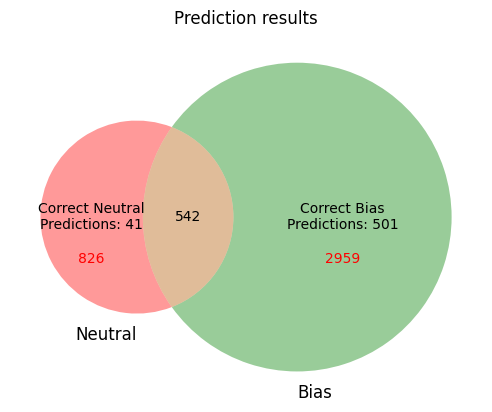

In [228]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Set the values for the diagram
correct_bias_predictions = 501
correct_neutral_predictions = 41
incorrect_bias_predictions = 2959
incorrect_neutral_predictions = 826

# Calculate the other values
correct_predictions = correct_bias_predictions + correct_neutral_predictions
total_incorrect_predictions = incorrect_bias_predictions + incorrect_neutral_predictions

# Create the Venn diagram
venn_labels = {'10': incorrect_neutral_predictions,
               '01': incorrect_bias_predictions,
               '11': correct_predictions}

venn = venn2(subsets=venn_labels, set_labels=('Neutral', 'Bias'))

# Add the correct predictions to the diagram
venn.get_label_by_id('10').set_text(f"Correct Neutral\nPredictions: {correct_neutral_predictions}")
venn.get_label_by_id('01').set_text(f"Correct Bias\nPredictions: {correct_bias_predictions}")

# Add the incorrect predictions to the diagram
plt.annotate(incorrect_neutral_predictions, xy=venn.get_label_by_id('10').get_position(),
             xytext=(-0, -30), textcoords='offset points', ha='center', va='center', fontsize=10, color='red')
plt.annotate(incorrect_bias_predictions, xy=venn.get_label_by_id('01').get_position(),
             xytext=(0, -30), textcoords='offset points', ha='center', va='center', fontsize=10, color='red')


# Add a title
plt.title('Prediction results')

# Display the diagram
plt.show()


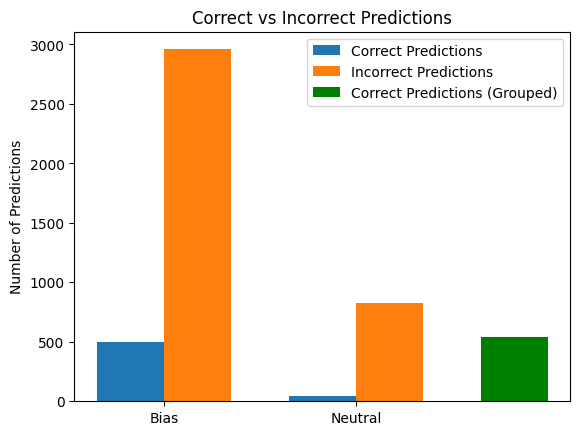

In [226]:
import matplotlib.pyplot as plt

labels = ['Bias', 'Neutral']
correct_predictions = [bias_correct_predictions, neutral_correct_predictions]
incorrect_predictions = [bias_incorrect_predictions, neutral_incorrect_predictions]

x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35

rects1 = ax.bar(x, correct_predictions, bar_width, label='Correct Predictions')
rects2 = ax.bar([i + bar_width for i in x], incorrect_predictions, bar_width, label='Incorrect Predictions')

ax.set_ylabel('Number of Predictions')
ax.set_title('Correct vs Incorrect Predictions')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Grouping correct predictions
total_correct_predictions = sum(correct_predictions)
ax.bar(len(labels), total_correct_predictions, bar_width, label='Correct Predictions (Grouped)', color='green')

plt.legend()
plt.show()


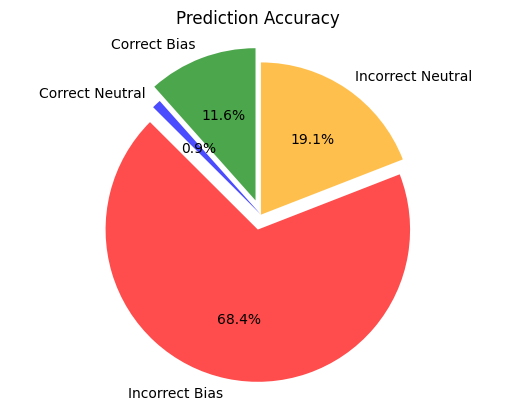

In [162]:
import matplotlib.pyplot as plt

# Create a pie chart
labels = ['Correct Bias', 'Correct Neutral', 'Incorrect Bias', 'Incorrect Neutral']
sizes = [bias_correct_predictions, neutral_correct_predictions, bias_incorrect_predictions, neutral_incorrect_predictions]
colors = ['green', 'blue', 'red', 'orange']
explode = (0.1, 0, 0.1, 0)  # Explode the slices

fig, ax = plt.subplots()
pie = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set opacity for colors
for patch in pie[0]:
    patch.set_alpha(0.7)

# Add title
ax.set_title('Prediction Accuracy')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()

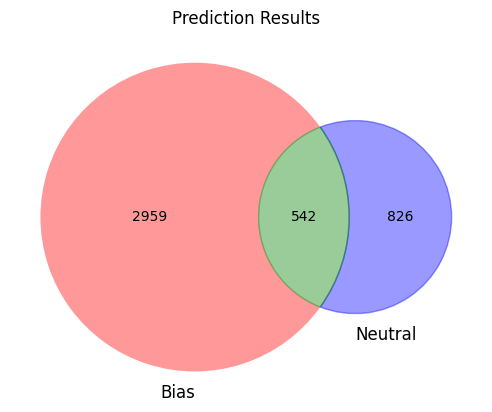

In [137]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create the Venn diagram
venn = venn2(subsets=(bias_incorrect_predictions, neutral_incorrect_predictions, total_correct),
             set_labels=('Bias', 'Neutral'))


# Add labels to each subset
venn.get_label_by_id('10').set_text(str(bias_incorrect_predictions))
venn.get_label_by_id('01').set_text(str(neutral_incorrect_predictions))
venn.get_label_by_id('11').set_text(str(total_correct))

venn.get_patch_by_id('01').set_color('blue')
venn.get_patch_by_id('11').set_color('green')

# Add a title
plt.title('Prediction Results')

# Display the diagram
plt.show()


## Tinkering with premise and hypothesis

In [209]:
messages = [
    "I enjoyed the book I just finished reading.",
    "The flowers in the garden are blooming beautifully.",
    "I had a delicious meal at the new restaurant in town.",
    "The sunset was breathtaking this evening.",
    "I'm looking forward to spending time with my family this weekend.",
    "The movie I watched yesterday was entertaining and funny.",
    "I love the smell of fresh coffee in the morning.",
    "The park is a peaceful place to relax and unwind.",
    "Waking up to birds chirping always puts me in a good mood.",
    "The beach is my favorite place to spend summer days.",
    "I'm grateful for the support of my friends and loved ones.",
    "Walking in nature always brings me a sense of calm and tranquility.",
    "Listening to my favorite music instantly lifts my spirits.",
    "I appreciate the beauty of art and the emotions it evokes.",
    "The sound of rain tapping on the window is so soothing.",
    "I enjoyed trying out a new recipe and it turned out delicious.",
    "The laughter of children playing is a joyful sound.",
    "I love the feeling of fresh clean sheets on my bed.",
    "Watching a good movie at home with popcorn is a great way to relax.",
    "The scent of freshly baked cookies fills the house with warmth."
]

hypothesis1 = "No bias or prejudice in the text."
hypothesis2 = "No prejudice or partiality towards a particular group or viewpoint."

for message in messages:
    print(predict_nli_label(message, hypothesis1))
    print(predict_nli_label(message, hypothesis2))
    print()

('neutral', [-2.177057981491089, -1.2427047491073608, 3.2078282833099365])
('neutral', [-1.8762832880020142, -0.9102925062179565, 2.350186586380005])

('contradiction', [0.6590874195098877, 0.062026798725128174, -0.8705683350563049])
('contradiction', [0.3758038580417633, -0.8619323372840881, 0.3339099586009979])

('contradiction', [1.1520565748214722, -0.5528265237808228, -0.7067392468452454])
('neutral', [-0.3406318724155426, -1.4079608917236328, 1.3494231700897217])

('entailment', [-0.037182725965976715, 0.1169387474656105, -0.27573180198669434])
('neutral', [-0.1658780425786972, -0.6838884353637695, 0.5593006610870361])

('neutral', [-0.7260547280311584, -0.4195540249347687, 0.7750886678695679])
('neutral', [-0.9754790663719177, -0.604687511920929, 1.0963389873504639])

('contradiction', [1.0308817625045776, -1.1774423122406006, -0.013312422670423985])
('neutral', [-0.8195962905883789, -1.3011456727981567, 1.670041561126709])

('neutral', [-0.18685677647590637, -0.5705138444900513

In [251]:
# Original

premise = "They should all be given long sentences and thrown in prison like they did during the crack epidemic but of course that situation involved a bunch o black and brown people so now its treatment sympathy and a public health emergency. You got to love America...that great Christian Nation. Unbelievable	"
hypothesis = "prejudice against blacks and christians"

predict_nli_label(premise,hypothesis)

('neutral', [-0.4628850221633911, -0.7170383334159851, 0.8611828684806824])

In [252]:
# Space removed at the end

premise = "They should all be given long sentences and thrown in prison like they did during the crack epidemic but of course that situation involved a bunch o black and brown people so now its treatment sympathy and a public health emergency. You got to love America...that great Christian Nation. Unbelievable"
hypothesis = "prejudice against blacks and christians"

predict_nli_label(premise,hypothesis)

('contradiction',
 [0.46037837862968445, -1.0315135717391968, 0.40564772486686707])

In [253]:
# Full stop added at the end

premise = "They should all be given long sentences and thrown in prison like they did during the crack epidemic but of course that situation involved a bunch o black and brown people so now its treatment sympathy and a public health emergency. You got to love America...that great Christian Nation. Unbelievable."
hypothesis = "Prejudice against blacks and christians."

predict_nli_label(premise,hypothesis)

('neutral', [-0.9001088738441467, -0.026556335389614105, 0.6404420733451843])

In [254]:
# Is this actually biased? Or just a comment?
premise = "Theres little difference between Muslim terrorists and Israeli terrorists."
hypothesis = "Prejudice against muslims,israelis."

predict_nli_label(premise,hypothesis)

('contradiction',
 [2.8732964992523193, -1.9241362810134888, -0.8850470781326294])

In [255]:
# Original

premise = "Yet these same groups look the other way when islam teaches it is O.K. to beat women to rape women for not dressing properly and allows the raping of non Islamic women The hypocrisy is staggering "
hypothesis = "prejudice against muslims "

predict_nli_label(premise,hypothesis)

('neutral', [-2.1999640464782715, -0.6984304189682007, 2.5423195362091064])

In [256]:
# Space removed at the end

premise = "Yet these same groups look the other way when islam teaches it is O.K. to beat women to rape women for not dressing properly and allows the raping of non Islamic women The hypocrisy is staggering"
hypothesis = "prejudice against muslims."

predict_nli_label(premise,hypothesis)

('neutral', [-1.855529546737671, -0.04032471776008606, 1.5293126106262207])

In [257]:
# Full stop added at the end

premise = "Yet these same groups look the other way when islam teaches it is O.K. to beat women to rape women for not dressing properly and allows the raping of non Islamic women The hypocrisy is staggering."
hypothesis = "prejudice against muslims."

predict_nli_label(premise,hypothesis)

('neutral', [-1.9522651433944702, 0.5057038068771362, 1.0878207683563232])